In [1]:
import jax
import optax

import matplotlib.pyplot as plt

from simplexity.generative_processes.hidden_markov_model import HiddenMarkovModel
from simplexity.generative_processes.transition_matrices import zero_one_random
from simplexity.predictive_models.rnn import RNN
from simplexity.training.train import train

In [5]:
key = jax.random.PRNGKey(0)

transition_matrices = zero_one_random()
vocab_size = transition_matrices.shape[0]
generative_process = HiddenMarkovModel(transition_matrices)
initial_gen_process_state = generative_process.state_eigenvector

hidden_size = 16
key, model_key = jax.random.split(key)
model = RNN(in_size=1, out_size=vocab_size, hidden_size=hidden_size, key=model_key)
optimizer = optax.adam(learning_rate=0.001)

sequence_len = 64
batch_size = 32
num_epochs = 1000

In [6]:
model, losses = train(
    key,
    model,
    optimizer,
    generative_process,
    initial_gen_process_state,
    num_epochs,
    batch_size,
    sequence_len,
    log_every = 1,
)

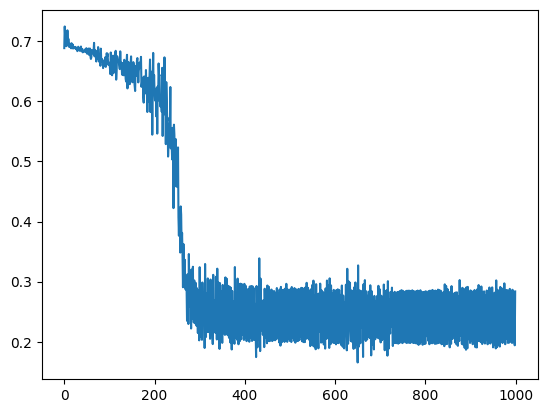

In [7]:
plt.plot(losses)